In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
path = os.path.join(os.getcwd(), 'data')
os.chdir(path)

FileNotFoundError: [Errno 2] No such file or directory: '/home/fotis/pylab/repos/Personal Project DA/data/data'

Start by importing the data.

In [2]:
date_time = pd.read_csv('date_time.csv')
stations = pd.read_csv('stations.csv')

In [49]:
date_time.head()

,member_casual,started_at,month,n_month,day,n_day_week,n_day_month,start_time,ride_duration
0,casual,2024-05-26 18:45:55 UTC,MAY,5,SUNDAY,1,26,18.45,10
1,member,2024-05-19 09:32:15 UTC,MAY,5,SUNDAY,1,19,9.32,6
2,casual,2024-05-28 13:35:18 UTC,MAY,5,TUESDAY,3,28,13.35,10
3,casual,2024-05-15 17:20:21 UTC,MAY,5,WEDNESDAY,4,15,17.20,2
4,member,2024-05-25 15:01:28 UTC,MAY,5,SATURDAY,7,25,15.01,15


In [75]:
date_time.shape

(5734381, 9)

In [112]:
date_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5734381 entries, 0 to 5734380
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   member_casual  object 
 1   started_at     object 
 2   month          object 
 3   n_month        int64  
 4   day            object 
 5   n_day_week     int64  
 6   n_day_month    int64  
 7   start_time     float64
 8   ride_duration  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 393.7+ MB


Save all "global" variables within the G class.


In [3]:
class G:
    m = 'member'
    c = 'casual'
    m_col = '#39b837'
    c_col = '#c42356'
    total_rides = date_time.shape[0]
    m_rides = date_time[date_time['member_casual'] == 'member'].shape[0]
    c_rides = date_time[date_time['member_casual'] == 'casual'].shape[0]

### Monthly engagement

In [7]:
# Create a month table.
month = date_time.loc[:, ['member_casual', 'month', 'n_month']]
month.head()

,member_casual,month,n_month
0,casual,MAY,5
1,member,MAY,5
2,casual,MAY,5
3,casual,MAY,5
4,member,MAY,5


In [39]:
df1 = month.groupby(['member_casual', 'month', 'n_month']).size()
df1 = df1.reset_index().sort_values(['n_month'])
df1.head()

,month,n_month,member_casual,0
8,JANUARY,1,casual,24460
9,JANUARY,1,member,120413
6,FEBRUARY,2,casual,47163
7,FEBRUARY,2,member,176001
15,MARCH,3,member,219137


## Data should not be treated as time series!

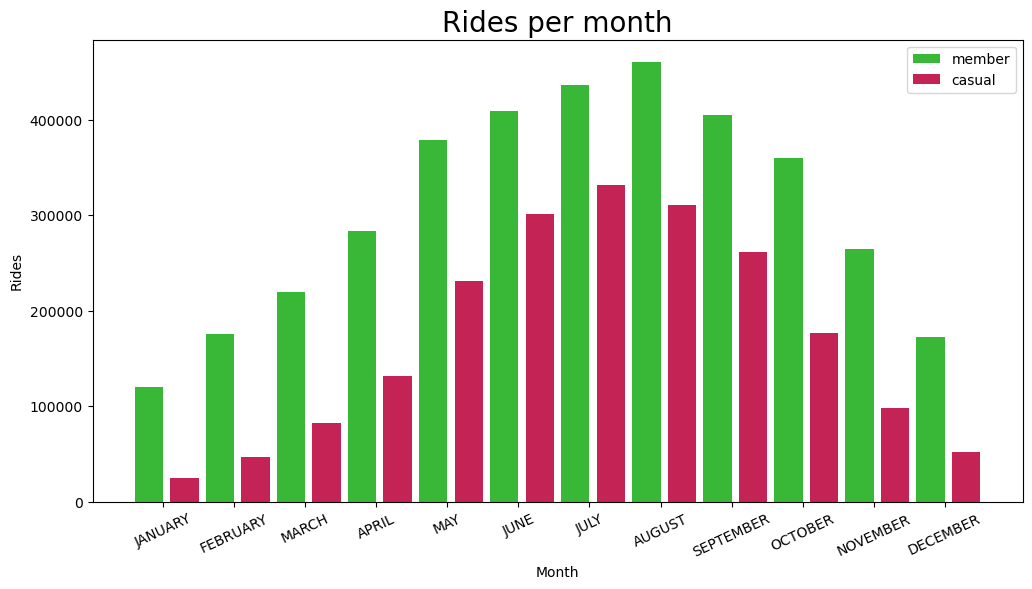

In [48]:
x = df1['n_month'].unique()
labels = df1['month'].unique()
member_count = df1[0][df1['member_casual'] == 'member']
casual_count = df1[0][df1['member_casual'] == 'casual']


plt.figure(figsize=(12, 6), dpi=100)
plt.bar(x -0.2, member_count, 0.4, label=G.m, color=G.m_col)
plt.bar(x + 0.3, casual_count, 0.4, label=G.c, color=G.c_col)
plt.xticks(x, labels, rotation=25)
plt.xlabel('Month')
plt.ylabel('Rides')
plt.legend()
plt.title('Rides per month', fontsize=20)
plt.show()

Add % percentages for the bars above.. eg july 15%

### Weekly engagement

In [54]:
week = date_time.loc[:, ['member_casual', 'day', 'n_day_week']]
df2 = week.groupby(['member_casual', 'day', 'n_day_week']).size()
df2 = df2.reset_index().sort_values(['n_day_week'])

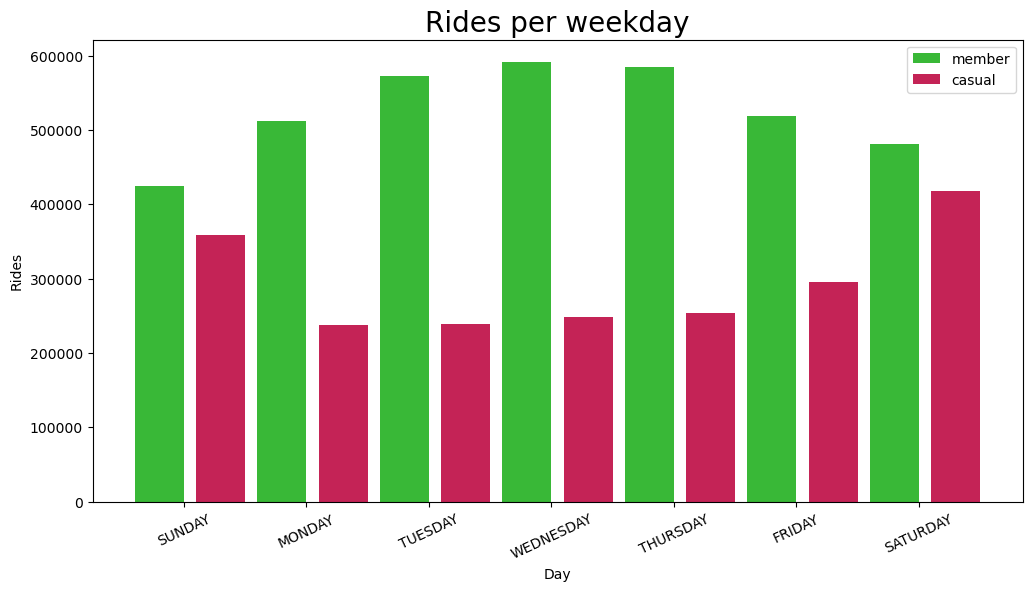

In [56]:
x = df2['n_day_week'].unique()
labels = df2['day'].unique()
member_count = df2[0][df2['member_casual'] == 'member']
casual_count = df2[0][df2['member_casual'] == 'casual']


plt.figure(figsize=(12, 6), dpi=100)
plt.bar(x -0.2, member_count, 0.4, label=G.m, color=G.m_col)
plt.bar(x + 0.3, casual_count, 0.4, label=G.c, color=G.c_col)
plt.xticks(x, labels, rotation=25)
plt.xlabel('Day')
plt.ylabel('Rides')
plt.legend()
plt.title('Rides per weekday', fontsize=20)
plt.show()

In [68]:
df2.head()

,member_casual,day,n_day_week,0
3,casual,SUNDAY,1,358317
10,member,SUNDAY,1,424288
1,casual,MONDAY,2,237139
8,member,MONDAY,2,511635
5,casual,TUESDAY,3,239133


In [76]:
# v is a True or False vector which holds True for every index that is either Sunday or Saturday.
v = (date_time['day'] == 'SATURDAY') | (date_time['day'] == 'SUNDAY')
weekend = date_time[v]
midweek = date_time[-v]
midweek_c = midweek[midweek['member_casual'] == G.c]
midweek_m = midweek[midweek['member_casual'] == G.m]
weekend_c = weekend[weekend['member_casual'] == G.c]
weekend_m = weekend[weekend['member_casual'] == G.m]


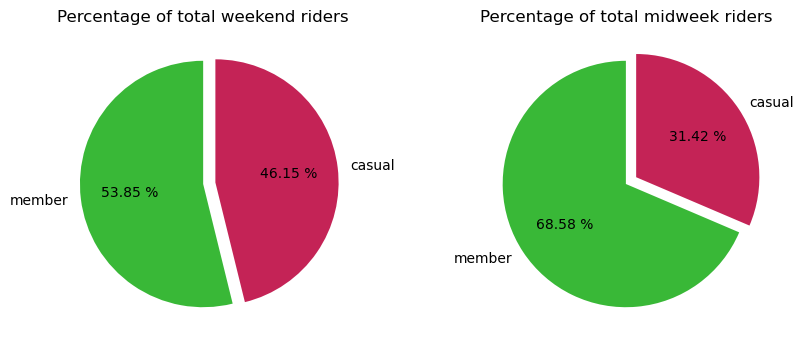

In [107]:
w = round(weekend.value_counts(weekend['member_casual'], normalize=True), 4) * 100
m = round(midweek.value_counts(midweek['member_casual'], normalize=True), 4) * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=100)
# Plot data on the first subplot
ax1.pie(w, 
        labels=w.index, 
        colors=[G.m_col, G.c_col],
        autopct='%.2f %%',
        explode=[0, 0.1],
        startangle=90 )
ax1.set_title('Percentage of total weekend riders')

# Plot data on the second subplot
ax2.pie(m, 
        labels=m.index, 
        colors=[G.m_col, G.c_col],
        autopct='%.2f %%',
        explode=[0, 0.1],
        startangle=90)
ax2.set_title('Percentage of total midweek riders')

plt.show()

Text(0.5, 1.0, 'casual riding preference')

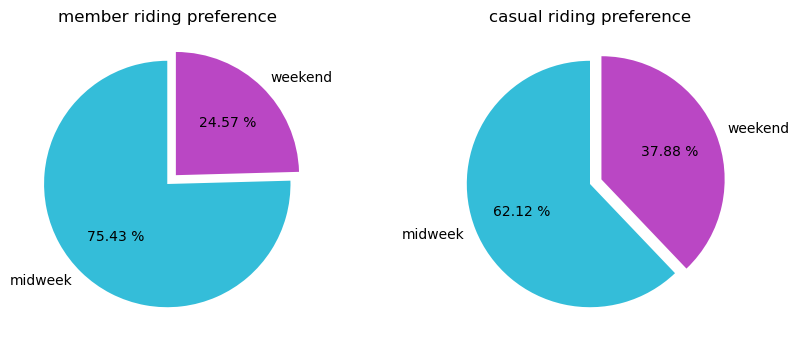

In [110]:
m_m = round( midweek_m.shape[0] / G.m_rides, 4) * 100
m_w = round(weekend_m.shape[0] / G.m_rides, 4) * 100
c_m = round(midweek_c.shape[0] / G.c_rides, 4) * 100
c_w = round(weekend_c.shape[0] / G.c_rides, 4) * 100
proportions = pd.DataFrame([[m_m, m_w],
                            [c_m, c_w] ], 
                            index=[G.m, G.c], columns=['midweek', 'weekend'])


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=100) 
# Plot data on the first subplot
ax1.pie(proportions.loc[G.m], 
        labels=['midweek', 'weekend'], 
        colors=['#34bdd9', '#ba47c4'],
        autopct='%.2f %%',
        explode=[0, 0.1],
        startangle=90 )
ax1.set_title('member riding preference')

# Plot data on the second subplot
ax2.pie(proportions.loc[G.c],
        labels=['midweek', 'weekend'],
        colors=['#34bdd9', '#ba47c4'],
        autopct='%.2f %%',
        explode=[0, 0.1],
        startangle=90)
ax2.set_title('casual riding preference')


### Hourly engagement

In [62]:
# Create an hour table.
hour = date_time.loc[:, ['member_casual', 'start_time']]


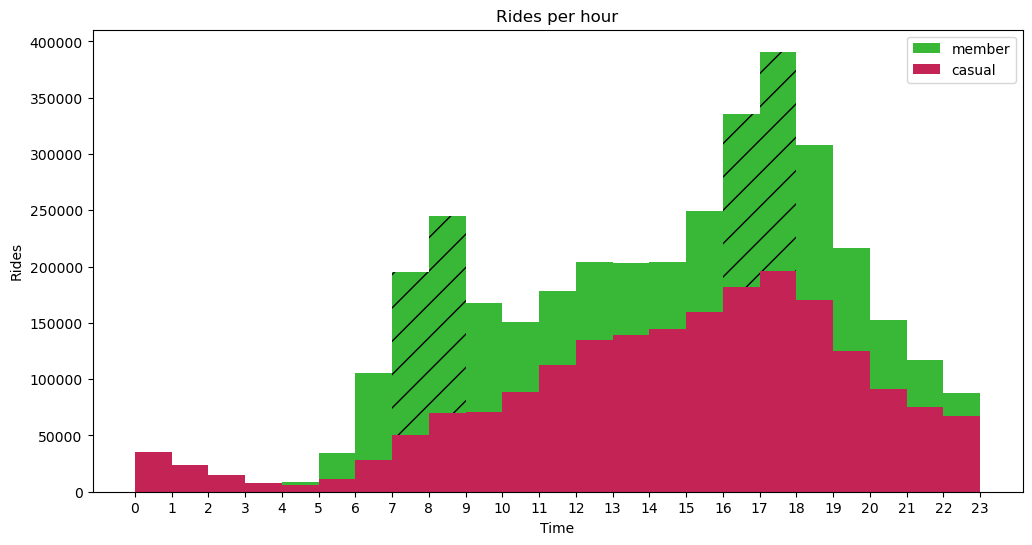

In [67]:
member = hour[hour['member_casual'] == G.m]
casual = hour[hour['member_casual'] == G.c]

plt.figure(figsize=(12, 6), dpi=100)

# Set the bins after taking a look at the default histogram
bins=np.arange(24)

# Create hist but also keep the bars variable in order to label the bars
counts, edges, bars = plt.hist(member['start_time'],bins=bins, color=G.m_col, label=G.m) # choose color from color picker(google search) bins=bins
plt.hist(casual['start_time'],bins=bins, color=G.c_col, label=G.c)

plt.xticks(ticks=bins)

bars[7].set_hatch('/')
bars[8].set_hatch('/')
bars[16].set_hatch('/')
bars[17].set_hatch('/')
#bars[4].set_hatch('**')
#bars[2].set_color('#6354b8')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Rides')
plt.title("Rides per hour", fontsize=20)

plt.show()

There is a similar pattern 7 through 9 all the way to 16 through 18. For members there is peak i the afternoon hours.

### Riding times

In [35]:
duration = date_time.loc[:, ['member_casual', 'ride_duration']]
duration.describe()

,ride_duration
count,5.734381e+06
mean,1.565882e+01
std,3.392755e+01
min,0.000000e+00
25%,6.000000e+00
50%,1.000000e+01
75%,1.700000e+01
max,1.439000e+03


For this section we will omit the entries with ride duration outside of the interval (0.30, 40). The reason for this decision has to do with the fact that most of these entries have likely occured due to system malfunctions and they do not add value to our analysis as they are further away for the 1st and 3rd quintiles. There are aslo many values with extreme ridings times (eg. 1000 min ) and many with zero duration which are signs of possible system malfuncctions of riders mistakes. Including them in the overall analysis is an open question.

In [27]:
duration = date_time.loc[:, ['member_casual', 'ride_duration']]
duration = duration[(duration['ride_duration'] > 0.30) & (duration['ride_duration'] < 40)]
m_d = duration[duration['member_casual'] == 'member']
c_d = duration[duration['member_casual'] == 'casual']

In [29]:
m_d['ride_duration'].describe(), c_d['ride_duration'].describe()

(count    3.540628e+06
 mean     1.079975e+01
 std      7.732813e+00
 min      1.000000e+00
 25%      5.000000e+00
 50%      9.000000e+00
 75%      1.400000e+01
 max      3.900000e+01
 Name: ride_duration, dtype: float64,
 count    1.779478e+06
 mean     1.320418e+01
 std      8.808738e+00
 min      1.000000e+00
 25%      6.000000e+00
 50%      1.100000e+01
 75%      1.800000e+01
 max      3.900000e+01
 Name: ride_duration, dtype: float64)

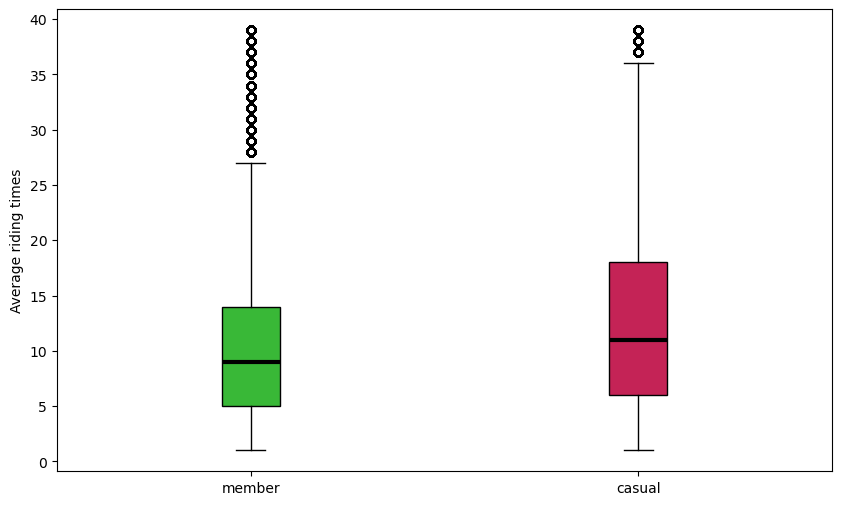

In [34]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
ax.set_ylabel('Average riding times')
arrays = [np.array(m_d['ride_duration']), np.array(c_d['ride_duration'])]
bplot = ax.boxplot(arrays,
                   patch_artist=True)  # will be used to label x-ticks
colors = [G.m_col, G.c_col]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
for median in bplot['medians']:
    median.set(color ='black',
               linewidth = 3)
ax.set_xticklabels([G.m, G.c])
plt.show()

Casuals seem to prefer longer rides. Having in mind that the data refer to an urban environment, the longer riding times might suggest tourism or other recreational activities espiacialy for rides in the [20 ,35] interval.